# 1. 스케일링이 필요한 이유

* 수치의 크기에 영향을 받는 모델은 특성의 데이터 분포 범위가 다를 경우 수치가 큰 특성에 영향을 많이 받을 수 밖에 없다.

* 딥러닝 모델의 경우 스케일링이 반드시 필요
* 머신러닝 모델 중에도 스케일링이 필요한 것이 있음
    * k-NN, SVM 등

# 2. 스케일링의 종류

Let $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ for all $x_i\in\mathbb{R}$.
* Min-Max scaling
    * 스케일링한 값이 0과 1사이에 오게 됨
    * 이상치에 민감함
\begin{equation*}
x'_{i} = \frac{x_{i}-\min(\mathbf{x})}{\max(\mathbf{x})-\min(\mathbf{x})}
\end{equation*}
    
    

* Standard scaling
    * 스케일링한 후 데이터가 정규분포를 따름
    * 즉 $\mathbf{x'} = (x'_1, x'_2, \ldots, x'_n)$은 평균이 0, 표준편차가 1인 분포를 갖게 됨
    * 평균과 표준편차가 이상치에 영향을 받기 때문에 이상치에 민감함

\begin{equation*}
x'_i = \frac{x_i-\mu_{\mathbf{x}}}{\sigma_{\mathbf{x}}},
\end{equation*}
where \begin{equation*}
\mu_{\mathbf{x}} = \frac{\sum_{i=1}^n x_i}{n}
\end{equation*}
and
\begin{equation*}
\sigma_{\mathbf{x}} = \sqrt{\frac{\sum_{i=1}^n (x_i-\mu_{\mathbf{x}})^2}{n}}
\end{equation*}


* Robust scaling
    * 이상치에 덜 민감
    * 중앙값이 $0$, IQR이 $1$로 변환
    * $Q_1(\mathbf{x})$:$1$사분위값
    * $Q_2(\mathbf{x})$:$2$사분위값, 중앙값
    * $Q_3(\mathbf{x})$:$3$사분위값
    
    
\begin{equation*}
x'_i = \frac{x_i-Q_2(\mathbf{x})}{Q_3(\mathbf{x})-Q_1(\mathbf{x})}
\end{equation*}


# 3. 스케일링 시각화

* sklearn 설치: pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)
print("sklearn: ", sklearn.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
seaborn:  0.12.1
matplotlib:  3.6.2
sklearn:  1.1.3


In [3]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [7]:
df = pd.read_csv("../data/scaling_data.csv",
                 encoding="utf-8",
                 index_col = 0)
df.head()

,x,y,target
0,0.8,-1.8,1
1,1.1,0.5,2
2,1.5,-1.4,1
3,1.2,-1.9,1
4,-0.1,2.0,2


In [5]:
color = df["target"].replace({1: 'tab:blue', 2: 'tab:red'})

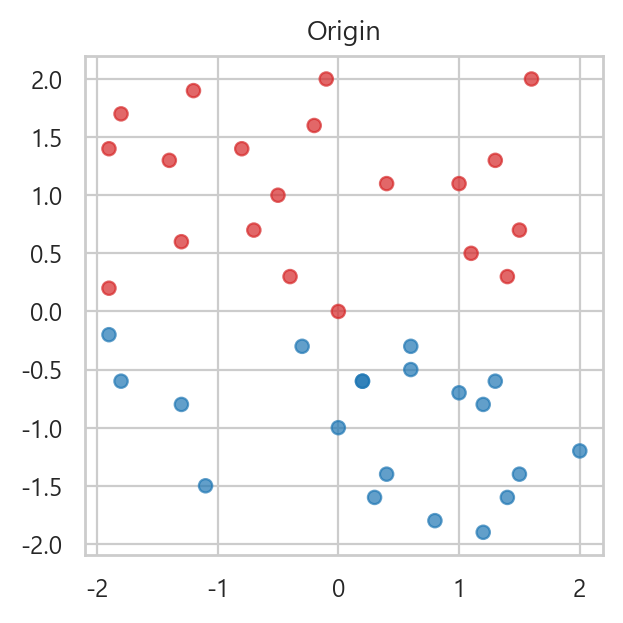

In [6]:
## df의 scatter plot을 그리시오

fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(x = df["x"],
           y = df["y"],
           alpha = 0.7,
           color = color)

ax.set(title = "Origin");

## 3.1 Min-Max scaling

Let $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ for all $x_i\in\mathbb{R}$.

* 스케일링한 값이 0과 1사이에 오게 됨
* 이상치에 민감함

\begin{equation*}
x'_{i} = \frac{x_{i}-\min(\mathbf{x})}{\max(\mathbf{x})-\min(\mathbf{x})}
\end{equation*}

In [8]:
## 수식에 따라 min_max 스케일링 함수를 만드시오.

def min_max(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))

In [9]:
minmax = MinMaxScaler()
df_min_max = minmax.fit_transform(df[["x", "y"]])
df_min_max

array([[0.69230769, 0.02564103],
       [0.76923077, 0.61538462],
       [0.87179487, 0.12820513],
       [0.79487179, 0.        ],
       [0.46153846, 1.        ],
       [0.82051282, 0.82051282],
       [0.        , 0.84615385],
       [0.64102564, 0.35897436],
       [0.87179487, 0.66666667],
       [0.15384615, 0.64102564],
       [0.38461538, 0.56410256],
       [0.02564103, 0.33333333],
       [0.8974359 , 1.        ],
       [0.82051282, 0.33333333],
       [0.28205128, 0.84615385],
       [0.53846154, 0.33333333],
       [0.74358974, 0.76923077],
       [0.15384615, 0.28205128],
       [0.41025641, 0.41025641],
       [0.53846154, 0.33333333],
       [0.20512821, 0.1025641 ],
       [0.30769231, 0.66666667],
       [0.17948718, 0.97435897],
       [1.        , 0.17948718],
       [0.        , 0.53846154],
       [0.02564103, 0.92307692],
       [0.48717949, 0.23076923],
       [0.74358974, 0.30769231],
       [0.58974359, 0.76923077],
       [0.64102564, 0.41025641],
       [0.

In [10]:
min_max(df["x"].values)

array([0.69230769, 0.76923077, 0.87179487, 0.79487179, 0.46153846,
       0.82051282, 0.        , 0.64102564, 0.87179487, 0.15384615,
       0.38461538, 0.02564103, 0.8974359 , 0.82051282, 0.28205128,
       0.53846154, 0.74358974, 0.15384615, 0.41025641, 0.53846154,
       0.20512821, 0.30769231, 0.17948718, 1.        , 0.        ,
       0.02564103, 0.48717949, 0.74358974, 0.58974359, 0.64102564,
       0.58974359, 0.43589744, 0.79487179, 0.48717949, 0.84615385,
       0.84615385, 0.        , 0.56410256, 0.35897436, 0.12820513])

## 3.2 Standard scaling

* 스케일링한 후 데이터가 정규분포를 따름
* 즉 $\mathbf{x'} = (x'_1, x'_2, \ldots, x'_n)$은 평균이 0, 표준편차가 1인 분포를 갖게 됨
* 평균과 표준편차가 이상치에 영향을 받기 때문에 이상치에 민감함

\begin{equation*}
x'_i = \frac{x_i-\mu_{\mathbf{x}}}{\sigma_{\mathbf{x}}},
\end{equation*}
where \begin{equation*}
\mu_{\mathbf{x}} = \frac{\sum_{i=1}^n x_i}{n}
\end{equation*}
and
\begin{equation*}
\sigma_{\mathbf{x}} = \sqrt{\frac{\sum_{i=1}^n (x_i-\mu_{\mathbf{x}})^2}{n}}
\end{equation*}


In [11]:
## 수식에 따라 Standard 스케일링 함수를 만드시오.

def standard(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean)/std

In [12]:
std = StandardScaler()
df_std = std.fit_transform(df[["x", "y"]])
df_std

array([[ 0.64204769, -1.58904493],
       [ 0.90233729,  0.39456611],
       [ 1.2493901 , -1.2440691 ],
       [ 0.98910049, -1.67528889],
       [-0.13882112,  1.68822549],
       [ 1.07586369,  1.08451778],
       [-1.70055874,  1.17076174],
       [ 0.46852129, -0.46787347],
       [ 1.2493901 ,  0.56705403],
       [-1.17997953,  0.48081007],
       [-0.39911072,  0.22207819],
       [-1.61379554, -0.55411743],
       [ 1.3361533 ,  1.68822549],
       [ 1.07586369, -0.55411743],
       [-0.74616353,  1.17076174],
       [ 0.12146848, -0.55411743],
       [ 0.81557409,  0.91202986],
       [-1.17997953, -0.72660535],
       [-0.31234752, -0.29538556],
       [ 0.12146848, -0.55411743],
       [-1.00645313, -1.33031306],
       [-0.65940033,  0.56705403],
       [-1.09321633,  1.60198153],
       [ 1.6832061 , -1.07158118],
       [-1.70055874,  0.13583423],
       [-1.61379554,  1.42949361],
       [-0.05205792, -0.89909327],
       [ 0.81557409, -0.64036139],
       [ 0.29499488,

## 3.3 Robust scaling

* 이상치에 덜 민감
* 중앙값이 0, IQR이 1로 변환
    
\begin{equation*}
x'_i = \frac{x_i-Q_2(\mathbf{x})}{Q_3(\mathbf{x})-Q_1(\mathbf{x})}
\end{equation*}


In [20]:
q_1 = np.quantile(df["x"].values, 0.25)

-0.875

In [21]:
## 수식에 따라 Robust 스케일링 함수를 만드시오.

def robust(x):
    iqr = np.quantile(df["x"], 0.75) - np.quantile(df["x"], 0.25)
    return (x - np.median(x))/iqr

In [22]:
## sklearn의 Robustscaler()를 이용하여 스케일링 하시오.

rob = RobustScaler()
df_rob = rob.fit_transform(df[["x", "y"]])

In [23]:
np.median(df_rob[:,0])

0.0

In [24]:
np.quantile(df_rob[:,0], 0.75) - np.quantile(df_rob[:,0], 0.25)

1.0

In [25]:
#minmaxscaling
minmax = MinMaxScaler()
df_min_max = minmax.fit_transform(df[["x", "y"]])

#standardscaling
std = StandardScaler()
df_std = std.fit_transform(df[["x", "y"]])

#robustscaling
rob = RobustScaler()
df_rob = rob.fit_transform(df[["x", "y"]])

## 3.4 비교

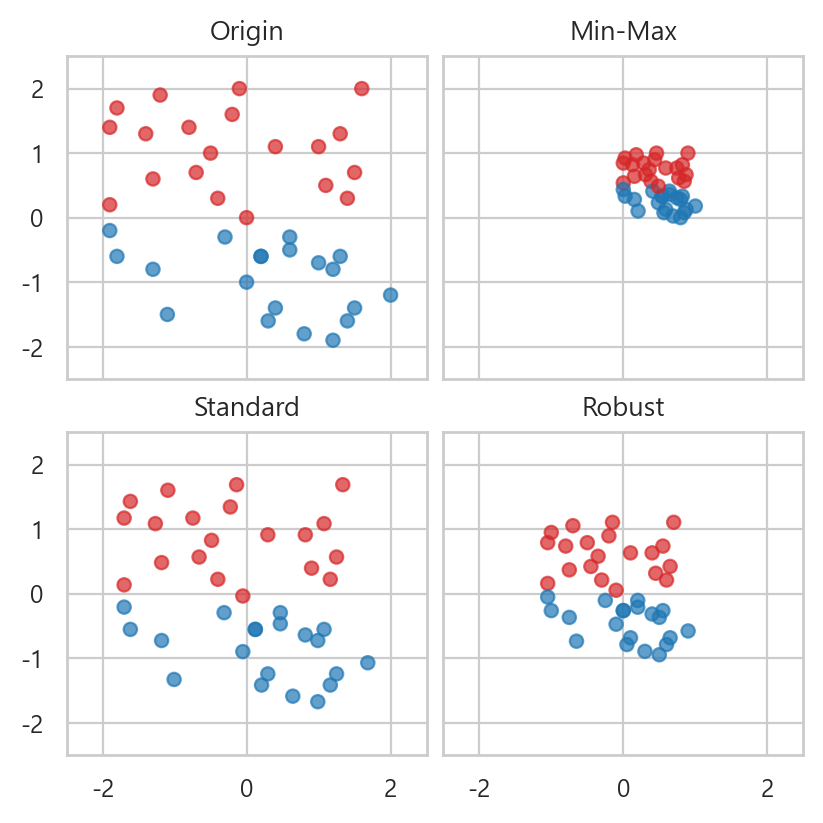

In [27]:
## 네 개의 스케일을 비교하는 그림을 그리시오.

fig, axes = plt.subplots(2, 2, figsize = (4,4), sharex = True, sharey = True)

scaling_data = [df[["x", "y"]].values, df_min_max, df_std, df_rob]
scaling_name = ["Origin", "Min-Max", "Standard", "Robust"]

for data, name, ax in zip(scaling_data, scaling_name, axes.flat):
    ax.scatter(x = data[:, 0],
               y = data[:, 1],
               alpha = 0.7,
               color = color)

    ax.set(title = name)
    ax.set_xlim(xmin = -2.5, xmax = 2.5)
    ax.set_ylim(ymin = -2.5, ymax = 2.5)
    
pass